## Imports:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Create_Dataset import create_dataset
import cv2 as cv

c:\Users\User\anaconda3\envs\myEnv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Reading the data

In [3]:
data = 'C:\\Users\\User\\PycharmProjects\\SignLanguageDetection\\data'
x_train, x_test, y_train, y_test, d = create_dataset(data)

## EDA - Exploratory Data Analysis

Below shows the shape of an individual image within the dataset.

In [4]:
print(x_train[0].shape)

(300, 300, 3)


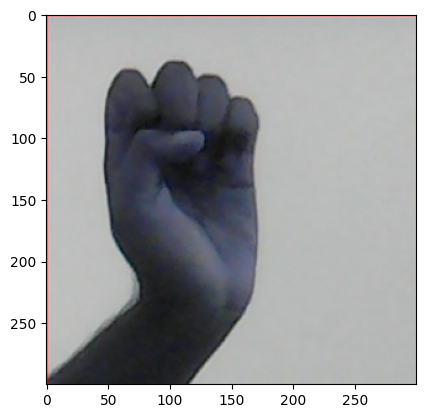

In [5]:
plt.imshow(x_train[0])

## Training  - CNN

In [6]:
## imports for the model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.activations import relu, sigmoid, softmax
from keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation=relu, input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(27, activation=softmax))

model.compile(optimizer='Adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
170/170 [==============================] - 199s 1s/step - loss: 7.0912 - accuracy: 0.7232
Epoch 2/3
170/170 [==============================] - 189s 1s/step - loss: 0.0637 - accuracy: 0.9884
Epoch 3/3
170/170 [==============================] - 189s 1s/step - loss: 0.0193 - accuracy: 0.9980


In [15]:
# import pickle
# ## save the CNN model using pickle
# filename = 'early_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [16]:
import pickle
early_model = pickle.load(open('early_model.sav', 'rb'))

In [18]:
early_model.evaluate(x_test, y_test)

84/84 [==============================] - 20s 234ms/step - loss: 0.0380 - accuracy: 0.9910


[0.03799094632267952, 0.9910213351249695]

dict_keys([])

## Testing and Evaluation

## OpenCV and using computor vision